# **DATA UNDERSTANDING**



In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

In [4]:
#Read Data
df = pd.read_csv('TelU_reviews.csv')
df.head()

,page,name,link,thumbnail,rating,date,snippet,images,local_guide
0,1,Daryl Cokelat,https://www.google.com/maps/contrib/1138191723...,https://lh3.googleusercontent.com/a-/ALV-UjXVE...,4.0,5 bulan lalu,"Kampus swasta di area yg padat, luas sekali t...",['https://lh5.googleusercontent.com/p/AF1QipMg...,True
1,1,Aries Indanarto,https://www.google.com/maps/contrib/1140064560...,https://lh3.googleusercontent.com/a/ACg8ocL-bK...,1.0,4 minggu lalu,Siang hari ini hadir wisuda anak. Tempat wisud...,['https://lh5.googleusercontent.com/p/AF1QipPt...,True
2,1,mfft_27,https://www.google.com/maps/contrib/1171607731...,https://lh3.googleusercontent.com/a-/ALV-UjVIK...,5.0,3 minggu lalu,jangan lupa follow Ig : mfft_27\ntrmksh 🙏🤩,['https://lh5.googleusercontent.com/p/AF1QipNP...,True
3,1,Fadhil Muhammad,https://www.google.com/maps/contrib/1038668775...,https://lh3.googleusercontent.com/a-/ALV-UjWsF...,5.0,6 bulan lalu,"Kampus swasta ternama, lokasi di bojongsoang k...",['https://lh5.googleusercontent.com/p/AF1QipMp...,True
4,1,Rachmat Hidayar,https://www.google.com/maps/contrib/1001440503...,https://lh3.googleusercontent.com/a-/ALV-UjVWC...,1.0,3 minggu lalu,Yang terhormat bapak kepala satpam dan manajem...,NaN,True


In [5]:
#Data Exploration
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998 entries, 0 to 997
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   page         998 non-null    int64  
 1   name         998 non-null    object 
 2   link         998 non-null    object 
 3   thumbnail    998 non-null    object 
 4   rating       998 non-null    float64
 5   date         998 non-null    object 
 6   snippet      970 non-null    object 
 7   images       222 non-null    object 
 8   local_guide  808 non-null    object 
dtypes: float64(1), int64(1), object(7)
memory usage: 70.3+ KB
None


In [6]:
#Data Exploration
print(df.describe())

             page      rating
count  998.000000  998.000000
mean    50.599198    4.411824
std     28.824160    1.183191
min      1.000000    1.000000
25%     26.000000    4.000000
50%     51.000000    5.000000
75%     75.750000    5.000000
max    100.000000    5.000000


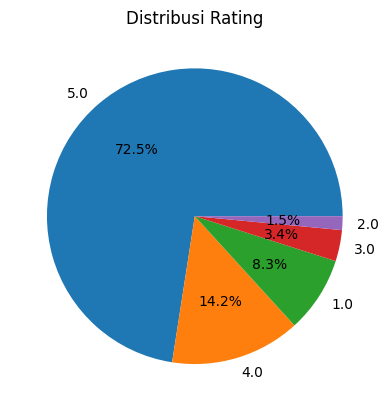

In [7]:
# Menampilkan Distribusi Rating menggunakan Pie Chart
rating_counts = df['rating'].value_counts()
plt.pie(rating_counts.values, labels=rating_counts.index, autopct='%1.1f%%')
plt.title('Distribusi Rating')
plt.show()

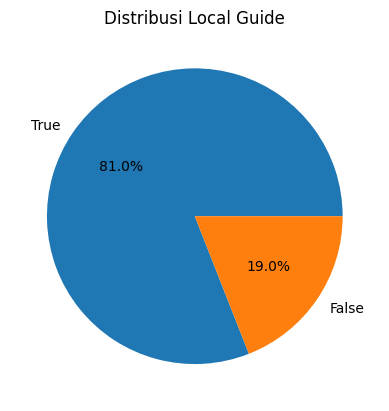

In [8]:
# Menampilkan Distribusi Local Guide menggunakan Pie Chart
lgNA = df['local_guide'].fillna('False')
lg_counts = lgNA.value_counts()
plt.pie(lg_counts.values, labels=lg_counts.index, autopct='%1.1f%%')
plt.title('Distribusi Local Guide')
plt.show()

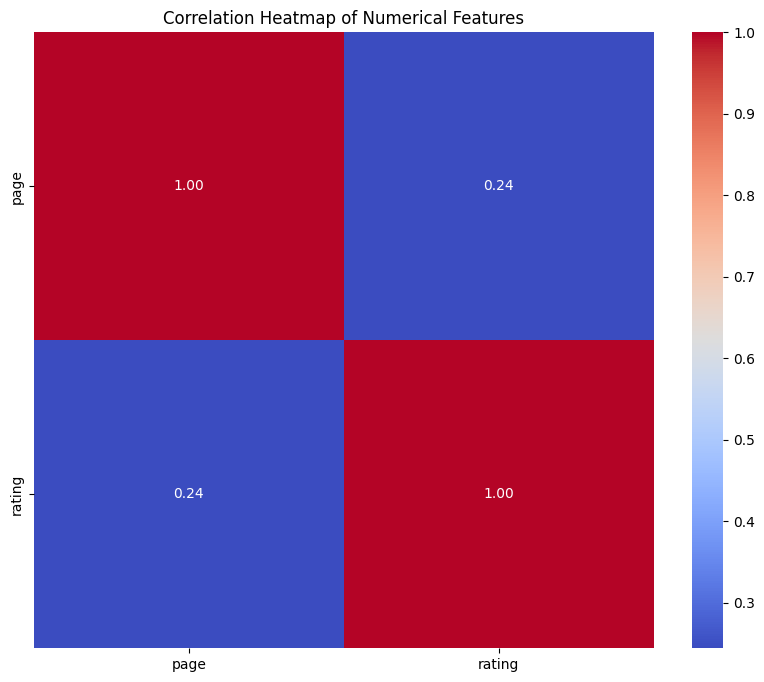

In [9]:
# Memilih kolom numerikal
numerical_cols = df.select_dtypes(include=np.number).columns
correlation_matrix = df[numerical_cols].corr()

# Membuat Korelasi Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [10]:
# Mengecek nilai null pada dataframe
df.isnull().sum()

page             0
name             0
link             0
thumbnail        0
rating           0
date             0
snippet         28
images         776
local_guide    190
dtype: int64

In [11]:
# Mengecek nilai duplikat pada dataframe
duplicates = df.duplicated().sum()
print(f'Jumlah duplikat yang ditemukan: {duplicates}')
duplicates = df[df.duplicated()]
print(f"Duplikat yang ditemukan:\n {duplicates}")

Jumlah duplikat yang ditemukan: 0
Duplikat yang ditemukan:
 Empty DataFrame
Columns: [page, name, link, thumbnail, rating, date, snippet, images, local_guide]
Index: []


# **DATA PREPARATION**

In [12]:
# Menghapus kolom yang tidak dibutuhkan
columsToDrop = ['page', 'thumbnail']
df = df.drop(columns=columsToDrop, axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998 entries, 0 to 997
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         998 non-null    object 
 1   link         998 non-null    object 
 2   rating       998 non-null    float64
 3   date         998 non-null    object 
 4   snippet      970 non-null    object 
 5   images       222 non-null    object 
 6   local_guide  808 non-null    object 
dtypes: float64(1), object(6)
memory usage: 54.7+ KB


In [13]:
# Menghapus baris yang tidak memiliki nilai pada kolom snippet
df = df.dropna(subset='snippet')
# Mengganti nilai yang null pada kolom local_guide menjadi False
df.loc[df['local_guide'].isnull(), 'local_guide'] = False
# Mengganti nilai yang null pada kolom images menjadi "Tidak ada"
df.loc[df['images'].isnull(), 'images'] = 'Tidak ada'
df.isnull().sum()

name           0
link           0
rating         0
date           0
snippet        0
images         0
local_guide    0
dtype: int64

In [14]:
# Mengubah/encoding kategori local_guide menjadi biner
encoder = LabelEncoder()
df['local_guide'] = encoder.fit_transform(df['local_guide'])

print(df.tail())

                     name                                               link  \
992         Shiva bishnoi  https://www.google.com/maps/contrib/1056764978...   
993         Haeria Haeria  https://www.google.com/maps/contrib/1128644444...   
995         Naufal Ardian  https://www.google.com/maps/contrib/1122072985...   
996  Yunia Rizki Ramdhani  https://www.google.com/maps/contrib/1089158247...   
997          Adi Sulistyo  https://www.google.com/maps/contrib/1029453702...   

     rating          date                        snippet  \
992     5.0  setahun lalu   Indonesia biggest University   
993     4.0  7 tahun lalu              Relax n enjoy ...   
995     3.0  7 tahun lalu  toward world class university   
996     5.0  7 tahun lalu                  good facility   
997     4.0  3 tahun lalu                      No coment   

                                                images  local_guide  
992                                          Tidak ada            1  
993  ['https://lh5

In [15]:
# Memberikan label pada rating
bins = [0, 3, 4, 5]  # Rentang rating: (0, 3] - Tidak Puas, (3, 4] - Cukup Puas, (4, 5] - Puas
labels = ['Tidak Puas', 'Cukup Puas', 'Puas']

df['rating_label'] = pd.cut(df['rating'], bins=bins, labels=labels, include_lowest=True)

print(df[['rating', 'rating_label']].head())

   rating rating_label
0     4.0   Cukup Puas
1     1.0   Tidak Puas
2     5.0         Puas
3     5.0         Puas
4     1.0   Tidak Puas


In [16]:
# Melakukan Regex yang dimana menghapus semua karakter yang tidak ada di whitelist dan mengganti semua karakter abjad menjadi huruf kecil
import re
def clean(text):
    text = text.lower()
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    return text

df['cleaned'] = df['snippet'].apply(clean)
df.head()

,name,link,rating,date,snippet,images,local_guide,rating_label,cleaned
0,Daryl Cokelat,https://www.google.com/maps/contrib/1138191723...,4.0,5 bulan lalu,"Kampus swasta di area yg padat, luas sekali t...",['https://lh5.googleusercontent.com/p/AF1QipMg...,1,Cukup Puas,kampus swasta di area yg padat luas sekali tp...
1,Aries Indanarto,https://www.google.com/maps/contrib/1140064560...,1.0,4 minggu lalu,Siang hari ini hadir wisuda anak. Tempat wisud...,['https://lh5.googleusercontent.com/p/AF1QipPt...,1,Tidak Puas,siang hari ini hadir wisuda anak tempat wisuda...
2,mfft_27,https://www.google.com/maps/contrib/1171607731...,5.0,3 minggu lalu,jangan lupa follow Ig : mfft_27\ntrmksh 🙏🤩,['https://lh5.googleusercontent.com/p/AF1QipNP...,1,Puas,jangan lupa follow ig mfft\ntrmksh
3,Fadhil Muhammad,https://www.google.com/maps/contrib/1038668775...,5.0,6 bulan lalu,"Kampus swasta ternama, lokasi di bojongsoang k...",['https://lh5.googleusercontent.com/p/AF1QipMp...,1,Puas,kampus swasta ternama lokasi di bojongsoang ka...
4,Rachmat Hidayar,https://www.google.com/maps/contrib/1001440503...,1.0,3 minggu lalu,Yang terhormat bapak kepala satpam dan manajem...,Tidak ada,1,Tidak Puas,yang terhormat bapak kepala satpam dan manajem...


In [17]:
# Melakukan perubahan pada teks yang telah dibersihkan menjadi numerikal agar dapat digunakan oleh model Machine Learning
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words_indonesian = set(stopwords.words('indonesian'))
tfidf = TfidfVectorizer(stop_words=list(stop_words_indonesian), max_features=350)
X = tfidf.fit_transform(df['cleaned'])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tubag\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
c:\Users\tubag\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\feature_extraction\text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  warnings.warn(


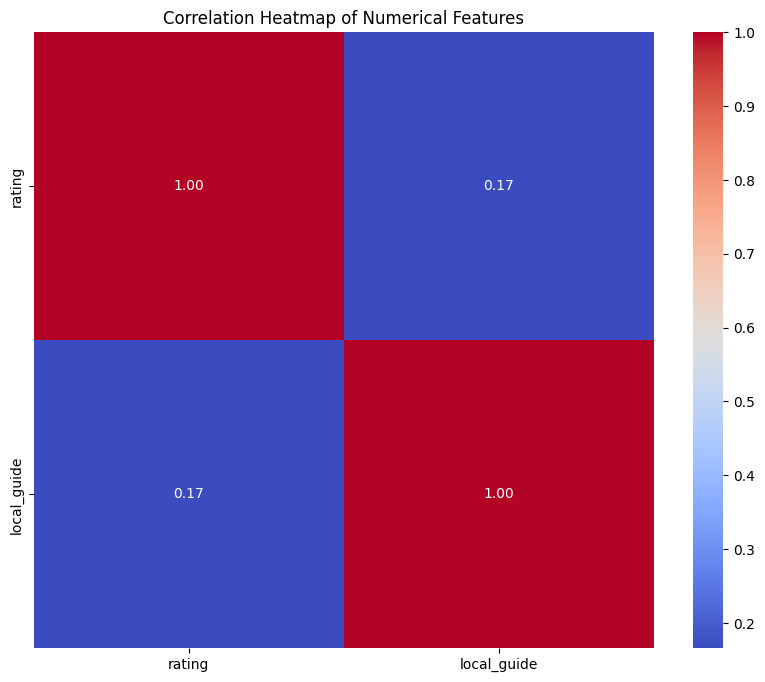

In [18]:
# Memilih kolom numerikal
numerical_cols = df.select_dtypes(include=np.number).columns
correlation_matrix = df[numerical_cols].corr()

# Create a heatmap untuk melihat korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

# **MODELING**

**Supervised Logistic Regression**

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import scipy

In [20]:
# Feature
# Combine TF-IDF features (X) and 'rating' column for input data
X_LR = scipy.sparse.hstack([X, df[['rating']].values])
# Target
y_LR = df['local_guide']

In [21]:
# Membagi data dengan data test sebesar 20%
X_train, X_test, y_train, y_test = train_test_split(X_LR, y_LR, test_size=0.2, random_state=42)

In [22]:
# Melakukan oversampling SMOTE
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_train, y_train)

In [23]:
# Cek hasil resampling
print("Sebelum SMOTE:", y_train.value_counts())
print("Setelah SMOTE:", y_resampled.value_counts())

Sebelum SMOTE: local_guide
1    624
0    152
Name: count, dtype: int64
Setelah SMOTE: local_guide
1    624
0    624
Name: count, dtype: int64


In [24]:
# Latih model logistic regression sebelum di oversampling
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [25]:
# Latih model logistic regression sesudah di oversampling
modelOversampling = LogisticRegression(max_iter=1000)
modelOversampling.fit(X_resampled, y_resampled)

LogisticRegression(max_iter=1000)

In [26]:
# Prediksi
y_pred = model.predict(X_test)
y_predOversampling = modelOversampling.predict(X_test)

**MODEL Unsupervised KMeans**

In [27]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


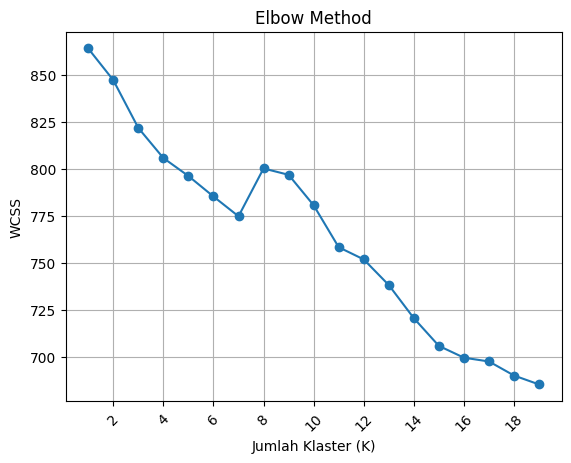

In [28]:
# Mencari nilai K untuk model K-Means dengan menggunakan metode Elbow
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.Figure(figsize=(12, 7))
plt.plot(range(1, 20), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Jumlah Klaster (K)')
plt.ylabel('WCSS')
plt.xticks(range(2, 20, 2), rotation=45)
plt.grid(True)
plt.show()

In [29]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

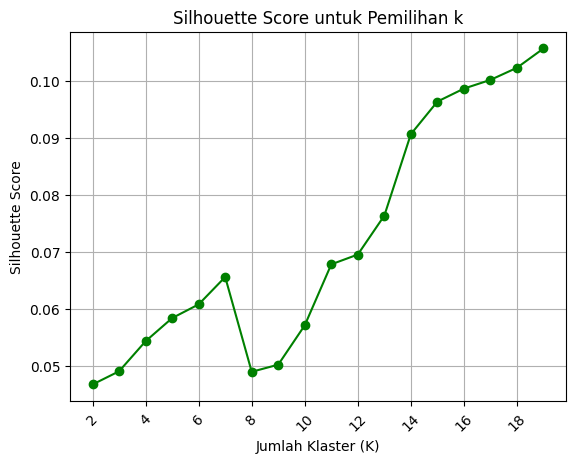

In [30]:
# Mencari nilai K pada model K-Means menggunakan metode Silhouettte Score
silhouette_scores = []
K_range = range(2, 20)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

plt.Figure(figsize=(12, 7))
plt.plot(K_range, silhouette_scores, 'go-')
plt.xlabel("Jumlah Klaster (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score untuk Pemilihan k")
plt.xticks(range(2, 20, 2), rotation=45)
plt.grid()
plt.show()

In [31]:
import numpy as np
from sklearn.cluster import KMeans
import pandas as pd

In [32]:
# max-features K Silhouette DBI | 757 18 0.08 2.92 | 350 18 0.09 2.37 | 1000 16 0.06 3.71

# Melakukan prediksi dengan k=18
k = 18
kmeans = KMeans(n_clusters=k, random_state=42)
df['cluster'] = kmeans.fit_predict(X)

NOTE: Sudah dicoba dicoba berbagai setting seperti merubah max_features, menggunakan ngram_range seperti 1-2 dan 1-3 di bagian vektorisasi snippet. Hasilnya adalah merubah atau menambahkan ngram_range tidak memperbagus hasil, akan tetapi merubah max_features < 757 maka akan menghasilkan silhouette score dan Davies Bouldin index yang bagus, dan hasil percobaannya adalah sebagai berikut: max-features K Silhouette DBI | 757 18 0.08 2.92 | 350 18 0.09 2.37 | 1000 16 0.06 3.71
Dengan ini saya ambil max_features 350 dan jumlah kluster nya adalah 18 sesuai dengan silhouette score dan elbow method.
Dan juga untuk Logistic Regression ditemukan max_featuresnya di 350

# **EVALUATION**

**Supervised Logistic Regression**

In [33]:
from sklearn.metrics import classification_report, confusion_matrix

In [34]:
# Evaluasi sebelum diseimbangkan (Oversampling)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[  2  28]
 [  0 164]]
              precision    recall  f1-score   support

           0       1.00      0.07      0.12        30
           1       0.85      1.00      0.92       164

    accuracy                           0.86       194
   macro avg       0.93      0.53      0.52       194
weighted avg       0.88      0.86      0.80       194



In [35]:
# Evaluasi sesudah diseimbangkan (Oversampling)
print(confusion_matrix(y_test, y_predOversampling))
print(classification_report(y_test, y_predOversampling))

[[ 16  14]
 [ 59 105]]
              precision    recall  f1-score   support

           0       0.21      0.53      0.30        30
           1       0.88      0.64      0.74       164

    accuracy                           0.62       194
   macro avg       0.55      0.59      0.52       194
weighted avg       0.78      0.62      0.67       194



In [36]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

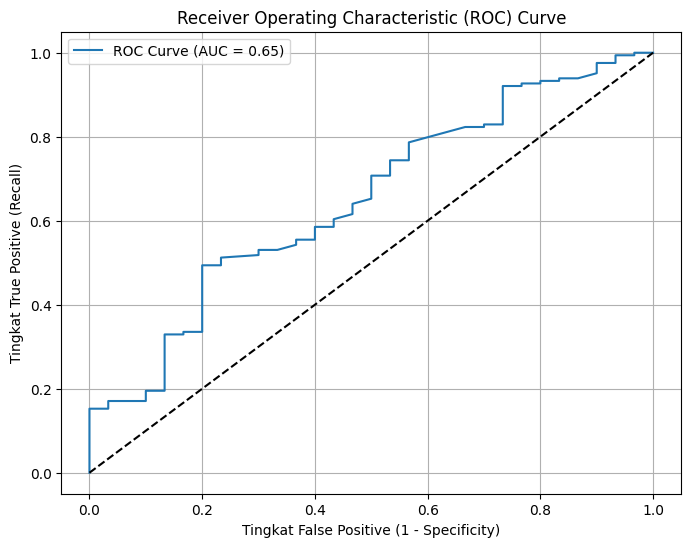


AUC: 0.65


In [37]:
# Menampilkan grafik ROC Curve untuk model Logistic Regression yang telah di oversampling

y_prob = modelOversampling.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Menghitung AUC
auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Tingkat False Positive (1 - Specificity)')
plt.ylabel('Tingkat True Positive (Recall)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()

print(f"\nAUC: {auc:.2f}")

**Unsupervised K-Means**

In [38]:
# Menghitung skor Silhouette pada model K-Means
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(X, df['cluster'])
print(f"Silhouette Score for K={k}: {silhouette_avg:.2f}")

Silhouette Score for K=18: 0.10


In [39]:
from sklearn.metrics import davies_bouldin_score
import numpy as np

# Mengubah matrix sparse X ke dense array
X_dense = X.toarray()

# Menghitung Davies-Bouldin Index menggunakan dense array
db_index = davies_bouldin_score(X_dense, df['cluster'])
print(f"Davies-Bouldin Index for K={k}: {db_index:.2f}")

Davies-Bouldin Index for K=18: 2.37


In [40]:
# Menghitung kluster metrics
cluster_ratings = df.groupby('cluster')['rating'].mean().reset_index()
cluster_counts = df['cluster'].value_counts().reset_index()
cluster_counts.columns = ['cluster', 'count']

# Mengambil kata-kata teratas setiap kluster
terms = tfidf.get_feature_names_out()
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]

# Membuat dataframe untuk memudahkan dalam melihat informasi
cluster_summary = pd.merge(cluster_ratings, cluster_counts, on='cluster')
cluster_summary['top_words'] = ''

for i in range(k):
    top_words = [terms[ind] for ind in order_centroids[i, :10]]
    cluster_summary.loc[cluster_summary['cluster'] == i, 'top_words'] = ', '.join(top_words)

# Mensortir kluster berdasarkan rata-rata rating
cluster_summary = cluster_summary.sort_values(by='rating', ascending=False)

print("Simpulan Kluster:")
print(cluster_summary)

print("\Detail Analisis Kluster:")

# Ubah ini untuk menampilkan jumlah kluster yang ingin ditampilkan
num_clusters_to_show = 5

# Menampilkan kluster berdasarkan rata-rata rating tertinggi
print(f"\nTop {num_clusters_to_show} Kluster berdasarkan rata-rata:")
for index, row in cluster_summary.head(num_clusters_to_show).iterrows():
    cluster_id = row['cluster']
    avg_rating = row['rating']
    top_words = row['top_words']
    print(f"Klaster {cluster_id} (Rating rata-rata {avg_rating:.2f}, Jumlah review: {cluster_counts.loc[cluster_counts['cluster']==cluster_id, 'count'].iloc[0]}):")
    print(" - Topik:", top_words)
    # Print a few sample snippets from this cluster
    print(" - Contoh snippet:")
    sample_snippets = df[df['cluster'] == cluster_id]['snippet'].sample(min(3, len(df[df['cluster'] == cluster_id]))).tolist()
    for snippet in sample_snippets:
        print(f"   - {snippet[:100]}...") # Print first 100 characters
    print()

# Menampilkan kluster berdasarkan rata-rata rating terendah
print(f"\nBottom {num_clusters_to_show} Clusters by Average Rating:")
for index, row in cluster_summary.tail(num_clusters_to_show).iterrows():
    cluster_id = row['cluster']
    avg_rating = row['rating']
    top_words = row['top_words']
    print(f"Klaster {cluster_id} (Rating rata-rata {avg_rating:.2f}, Jumlah review: {cluster_counts.loc[cluster_counts['cluster']==cluster_id, 'count'].iloc[0]}):")
    print(" - Topik:", top_words)
    # Untuk menampilkan bebearap contoh snippet
    print(" - Contoh snippet:")
    sample_snippets = df[df['cluster'] == cluster_id]['snippet'].sample(min(3, len(df[df['cluster'] == cluster_id]))).tolist()
    for snippet in sample_snippets:
        print(f"   - {snippet[:100]}...") # Menampilkan 100 karakter pertama
    print()

# Untuk menampilkan berdasarkan jumlah topik yang paling sering ada
# cluster_summary = cluster_summary.sort_values(by='count', ascending=False)
# print("\nTop Clusters by Size:")

Simpulan Kluster:
    cluster    rating  count  \
16       16  5.000000      2   
2         2  5.000000      1   
7         7  4.900000     20   
4         4  4.875000     16   
5         5  4.863636     22   
9         9  4.854167     48   
1         1  4.846154     39   
6         6  4.800000      5   
14       14  4.796875     64   
13       13  4.739130     23   
10       10  4.649123     57   
12       12  4.550000     40   
17       17  4.526316     38   
11       11  4.434783     23   
0         0  4.400000     60   
3         3  4.211934    486   
8         8  3.500000      6   
15       15  2.950000     20   

                                            top_words  
16  makan, tp, tolong, tol, toilet, to, tinggal, t...  
2   tersedia, spot, studi, negeri, menimba, bangun...  
7   mantap, luas, nyaman, pokoknya, univ, kampus, ...  
4   sejuk, kampusnya, yg, kampus, pohon, rindang, ...  
5   bersih, nyaman, luas, asri, bagus, nya, kampus...  
9   universitas, terbaik, swasta, sal

<>:24: SyntaxWarning: invalid escape sequence '\D'
<>:24: SyntaxWarning: invalid escape sequence '\D'
C:\Users\tubag\AppData\Local\Temp\ipykernel_8848\1460546378.py:24: SyntaxWarning: invalid escape sequence '\D'
  print("\Detail Analisis Kluster:")


# **DEPLOYMENT**

NOTE Deployment:
- Revisi Beranda (Tambahin visualisasi, mungkin tambahin lainnya juga kalau ada, (Latar belakang, data Asli dan data setelah pemodelan dibiarin aja)

In [41]:
import joblib

# Save Logistic Regression model
joblib.dump(model, 'logistic_regression_model.pkl')

# Save Oversampling Logistic Regression model
joblib.dump(modelOversampling, 'logistic_regression_oversampling_model.pkl')

# Save K-Means model
joblib.dump(kmeans, 'kmeans_model.pkl')

# Save TF-IDF vectorizer
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']

In [42]:
%%writefile app.py

import streamlit as st
import seaborn as sns
import pandas as pd
import numpy as np
import joblib
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
import scipy
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score, silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt

# Download NLTK data if not already downloaded
try:
    stopwords = nltk.data.find('corpora/stopwords')
except nltk.downloader.DownloadError:
    nltk.download('stopwords')
except LookupError:
    nltk.download('stopwords')

# Load the saved models and preprocessors
logistic_regression_model = joblib.load('logistic_regression_model.pkl')
logistic_regression_oversampling_model = joblib.load('logistic_regression_oversampling_model.pkl')
kmeans_model = joblib.load('kmeans_model.pkl')
tfidf_vectorizer = joblib.load('tfidf_vectorizer.pkl')

#Read Data
dataAsli = pd.read_csv("TelU_reviews.csv")
data = pd.read_csv("TelU_reviews.csv")

# Menghapus kolom yang tidak dibutuhkan
columsToDrop = ['page', 'thumbnail']
data = data.drop(columns=columsToDrop, axis=1)

# Menghapus baris yang tidak memiliki nilai pada kolom snippet
data = data.dropna(subset='snippet')
# Mengganti nilai yang null pada kolom local_guide menjadi False
data.loc[data['local_guide'].isnull(), 'local_guide'] = False
# Mengganti nilai yang null pada kolom images menjadi "Tidak ada"
data.loc[data['images'].isnull(), 'images'] = 'Tidak ada'

# Menghapus baris yang tidak memiliki nilai pada kolom snippet
data = data.dropna(subset='snippet')
# Mengganti nilai yang null pada kolom local_guide menjadi False
data.loc[data['local_guide'].isnull(), 'local_guide'] = False
# Mengganti nilai yang null pada kolom images menjadi "Tidak ada"
data.loc[data['images'].isnull(), 'images'] = 'Tidak ada'
# Encoding local_guide
encoder = LabelEncoder()
data['local_guide'] = encoder.fit_transform(data['local_guide'])

# Define the clean function (same as in your notebook)
def clean(text):
    text = text.lower()
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    return text
data['cleaned'] = data['snippet'].apply(clean)

# Melakukan perubahan pada teks yang telah dibersihkan menjadi numerikal agar dapat digunakan oleh model Machine Learning
X = tfidf_vectorizer.fit_transform(data['cleaned'])

# Feature
# Combine TF-IDF features (X) and 'rating' column for input data
X_LR = scipy.sparse.hstack([X, data[['rating']].values])
# Target
y_LR = data['local_guide']

# Pemodelan Regresi Logistik
y_pred = logistic_regression_model.predict(X_LR)
y_prob = logistic_regression_model.predict_proba(X_LR)[:, 1]

acc = accuracy_score(y_LR, y_pred)
prec = precision_score(y_LR, y_pred)
rec = recall_score(y_LR, y_pred)
f1 = f1_score(y_LR, y_pred)
roc_auc = roc_auc_score(y_LR, y_prob)

y_predOversampling = logistic_regression_oversampling_model.predict(X_LR)
y_probOversampling = logistic_regression_oversampling_model.predict_proba(X_LR)[:, 1]

acc_oversampling = accuracy_score(y_LR, y_predOversampling)
prec_oversampling = precision_score(y_LR, y_predOversampling)
rec_oversampling = recall_score(y_LR, y_predOversampling)
f1_oversampling = f1_score(y_LR, y_predOversampling)
roc_auc_oversampling = roc_auc_score(y_LR, y_probOversampling)

# Pemodelan K-Means Clustering
# Melakukan prediksi dengan k=18
k = 18
data['cluster'] = kmeans_model.fit_predict(X)

# Menghitung skor Silhouette pada model K-Means
silhouette_avg = silhouette_score(X, data['cluster'])

X_dense = X.toarray()

# Menghitung Davies-Bouldin Index menggunakan dense array
db_index = davies_bouldin_score(X_dense, data['cluster'])

# Menghitung kluster metrics
cluster_ratings = data.groupby('cluster')['rating'].mean().reset_index()
cluster_counts = data['cluster'].value_counts().reset_index()
cluster_counts.columns = ['cluster', 'count']

# Mengambil kata-kata teratas setiap kluster
terms = tfidf_vectorizer.get_feature_names_out()
order_centroids = kmeans_model.cluster_centers_.argsort()[:, ::-1]

# Membuat dataframe untuk memudahkan dalam melihat informasi
cluster_summary = pd.merge(cluster_ratings, cluster_counts, on='cluster')
cluster_summary['top_words'] = ''

# Memberikan label pada rating
bins = [0, 3, 4, 5]  # Rentang rating: (0, 3] - Tidak Puas, (3, 4] - Cukup Puas, (4, 5] - Puas
labels = ['Tidak Puas', 'Cukup Puas', 'Puas']
cluster_summary['rating_label'] = pd.cut(cluster_summary['rating'], bins=bins, labels=labels, include_lowest=True)

for i in range(k):
    top_words = [terms[ind] for ind in order_centroids[i, :10]]
    cluster_summary.loc[cluster_summary['cluster'] == i, 'top_words'] = ', '.join(top_words)

# Mensortir kluster berdasarkan rata-rata rating
cluster_summary = cluster_summary.sort_values(by='rating', ascending=False)

# Ubah ini untuk menampilkan jumlah kluster yang ingin ditampilkan
num_clusters_to_show = 18

# Menampilkan kluster berdasarkan rata-rata rating tertinggi
def show_top_clusters(num_clusters_to_show):
  st.subheader(f"{num_clusters_to_show} Cluster berdasarkan rata-rata rating:")
  for index, row in cluster_summary.head(num_clusters_to_show).iterrows():
      cluster_id = row['cluster']
      avg_rating = row['rating']
      top_words = row['top_words']
      rating_label = row['rating_label']
      st.write(f"**Cluster {cluster_id}** (Kepuasan: {rating_label}, Rating rata-rata {avg_rating:.2f}, Jumlah review: {cluster_counts.loc[cluster_counts['cluster']==cluster_id, 'count'].iloc[0]}):")
      st.write(" - Topik:", top_words)
      st.write(" - Contoh snippet:")
      sample_snippets = data[data['cluster'] == cluster_id]['snippet'].sample(min(3, len(data[data['cluster'] == cluster_id]))).tolist()
      for snippet in sample_snippets:
          st.write(f"   {snippet[:100]}...") # Print first 100 characters
      st.markdown("---")

def show_cluster(cluster_to_show):
  st.subheader(f"Prediksi Cluster:")
  cluster_info = cluster_summary[cluster_summary['cluster'] == cluster_to_show]
  row = cluster_info.iloc[0]
  cluster_id = row['cluster']
  avg_rating = row['rating']
  top_words = row['top_words']
  rating_label = row['rating_label']

  st.write(f"**Cluster {cluster_id}** (Kepuasan: {rating_label}, Rating rata-rata {avg_rating:.2f}, Jumlah review: {cluster_counts.loc[cluster_counts['cluster']==cluster_id, 'count'].iloc[0]}):")
  st.write(" - Topik:", top_words)
  st.write(" - Contoh snippet:")

  # Filter data original snippetnya buat spesifik cluster ini
  sample_snippets = data[data['cluster'] == cluster_id]['snippet'].sample(min(3, len(data[data['cluster'] == cluster_id]))).tolist()
  for snippet in sample_snippets:
      st.write(f"   {snippet[:100]}...") # Print first 100 characters


# Streamlit App
st.title("Prediksi dan Pengelompokan Ulasan Telkom University App")

st.write("Aplikasi ini menggunakan Regresi Logistik untuk memprediksi apakah seorang reviewer adalah Local Guide dan K-Means untuk mengelompokan review.")

st.sidebar.header("Navigasi")
app_mode = st.sidebar.selectbox("Pilih bagian untuk dijelajahi:",
                                ["Beranda", "Pemodelan: Regresi Logistik", "Pemodelan: K-Means Clustering"])

st.sidebar.markdown("---")
st.sidebar.info("Aplikasi ini didasarkan pada *notebook* 'Tubes_Data_Mining.ipynb'.")

if app_mode == "Beranda":
    st.header("🏠 Beranda")
    st.markdown("""
    Aplikasi ini menampilkan analisis yang dilakukan berdasarkan *notebook* `Tubes_Data_Mining.ipynb`.
    Gunakan *sidebar* untuk bernavigasi melalui berbagai tahapan proses *data mining*.

    ### Latar Belakang
    Ulasan online, khususnya dari Google Maps, merupakan sumber data yang kaya akan opini dan sentimen pengguna terhadap suatu institusi. Analisis terhadap ulasan Telkom University dapat memberikan wawasan berharga mengenai persepsi publik, tingkat kepuasan, serta area-area yang memerlukan perbaikan.

    ### Tahapan Analisis yang Dicakup:
    -   **Pemahaman Data:** Eksplorasi awal dan visualisasi data.
    -   **Persiapan Data:** Pembersihan data, penanganan nilai yang hilang, *encoding* fitur, dan pra-pemrosesan teks.
    -   **Modeling Regresi Logistik:** Model *supervised learning* untuk memprediksi status '*Local Guide*' seorang *reviewer*.
    -   **Modeling K-Means Clustering:** Model *unsupervised learning* untuk mengelompokkan ulasan serupa berdasarkan kontennya.
    """)
    st.markdown("---")
    st.subheader("Pemahaman Data")
    st.markdown("Contoh Data Asli:")
    st.dataframe(dataAsli.head(10))
    st.markdown("""Berikut adalah atribut yang ada pada eksplorasi dataset:\n
    Page: Menunjukkan nomor halaman tempat ulasan diambil.
    name: Nama pengguna yang memberikan ulasan.
    link: URL yang mengarah ke profil Google Maps pengguna.
    thumbnail: URL foto profil pengguna.
    rating: Rating bintang yang diberikan oleh pengguna (1 hingga 5).
    date: Tanggal saat ulasan diberikan.
    snippet: Isi ulasan yang ditulis oleh pengguna.
    images: URL gambar yang diunggah oleh pengguna bersama ulasan (jika ada).
    local_guide: Menunjukkan apakah pengguna merupakan Google Local Guide (True atau NaN.
    Berikut adalah atribut yang ada pada eksplorasi dataset:
    Page: Menunjukkan nomor halaman tempat ulasan diambil.
    name: Nama pengguna yang memberikan ulasan.
    link: URL yang mengarah ke profil Google Maps pengguna.
    thumbnail: URL foto profil pengguna.
    rating: Rating bintang yang diberikan oleh pengguna (1 hingga 5).
    date: Tanggal saat ulasan diberikan.
    snippet: Isi ulasan yang ditulis oleh pengguna.
    images: URL gambar yang diunggah oleh pengguna bersama ulasan (jika ada).
    local_guide: Menunjukkan apakah pengguna merupakan Google Local Guide (True atau NaN.
    """)
    st.markdown("Statistik Deskriptif:")
    st.write(dataAsli.describe())
    st.markdown("Pie Chart Distribusi Rating:")
    rating_counts = dataAsli['rating'].value_counts()
    fig, ax = plt.subplots()
    ax.pie(rating_counts.values, labels=rating_counts.index, autopct='%1.1f%%')
    ax.set_title('Distribusi Rating')
    st.pyplot(fig)
    st.markdown("Pie Chart Distribusi Local Guide:")
    lgNA = dataAsli['local_guide'].fillna('False')
    lg_counts = lgNA.value_counts()
    fig, ax = plt.subplots()
    ax.pie(lg_counts.values, labels=lg_counts.index, autopct='%1.1f%%')
    ax.set_title('Distribusi Local Guide')
    st.pyplot(fig)
    st.markdown("Heatmap Korelasi Data Numerikal:")
    numerical_cols = dataAsli.select_dtypes(include=np.number).columns
    correlation_matrix = dataAsli[numerical_cols].corr()
    fig, ax = plt.subplots(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", ax=ax)
    ax.set_title('Heatmap Korelasi Numerikal')
    st.pyplot(fig)
    st.markdown("Jumlah Nilai Null pada setiap kolom:")
    st.write(dataAsli.isnull().sum())
    st.markdown("Jumlah Baris Duplikat pada setiap kolom:")
    st.write(dataAsli[dataAsli.duplicated()])
    st.markdown("---")
    st.subheader("Persiapan Data")
    st.markdown("Menghapus kolom page dan thumbnail karena tidak dibutuhkan:")
    code = '''
    columsToDrop = ['page', 'thumbnail']
    df = df.drop(columns=columsToDrop, axis=1)
    '''
    st.code(code, language='python')
    st.markdown("Menghapus baris yang tidak memiliki nilai pada kolom snippet:")
    code = '''
    df = df.dropna(subset='snippet')
    '''
    st.code(code, language='python')
    st.markdown("Mengganti nilai yang null pada kolom local_guide menjadi False:")
    code = '''
    df.loc[df['local_guide'].isnull(), 'local_guide'] = False
    '''
    st.code(code, language='python')
    st.markdown("Mengganti nilai yang null pada kolom images menjadi 'Tidak ada':")
    code = '''
    df.loc[df['images'].isnull(), 'images'] = 'Tidak ada'
    '''
    st.code(code, language='python')
    st.markdown("Mengubah/encoding kategori local_guide menjadi biner:")
    code = '''
    encoder = LabelEncoder()
    df['local_guide'] = encoder.fit_transform(df['local_guide'])
    '''
    st.code(code, language='python')
    st.markdown("Memberikan label pada rating:")
    code = '''
    bins = [0, 3, 4, 5]  # Rentang rating: (0, 3] - Tidak Puas, (3, 4] - Cukup Puas, (4, 5] - Puas
    labels = ['Tidak Puas', 'Cukup Puas', 'Puas']

    df['rating_label'] = pd.cut(df['rating'], bins=bins, labels=labels, include_lowest=True)
    '''
    st.code(code, language='python')
    st.markdown("Melakukan Regex yang dimana menghapus semua karakter yang tidak ada di whitelist dan mengganti semua karakter abjad menjadi huruf kecil:")
    code = '''
    def clean(text):
        text = text.lower()
        text = re.sub(r"[^a-zA-Z\s]", "", text)
        return text

    df['cleaned'] = df['snippet'].apply(clean)
    '''
    st.code(code, language='python')
    st.markdown("Melakukan perubahan pada teks yang telah dibersihkan menjadi numerikal agar dapat digunakan oleh model Machine Learning:")
    code = '''
    from sklearn.feature_extraction.text import TfidfVectorizer
    import nltk
    from nltk.corpus import stopwords

    nltk.download('stopwords')
    stop_words_indonesian = set(stopwords.words('indonesian'))
    tfidf = TfidfVectorizer(stop_words=list(stop_words_indonesian), max_features=350)
    X = tfidf.fit_transform(df['cleaned'])
    '''
    st.code(code, language='python')
    st.markdown("Contoh Data Setelah Pembersihan:")
    st.dataframe(data.head(10))

elif app_mode == "Pemodelan: Regresi Logistik":
    # Input for Logistic Regression
    st.header("📈 Pemodelan: Regresi Logistik")
    st.markdown("Memprediksi apakah seorang Reviewer seorang Local Guide menggunakan Regresi Logistik berdasarkan Review Snippet dan Rating.")
    # Create the tabs
    tab_titles = ["Sebelum Oversampling", "Sesudah Oversampling"]
    tab1, tab2 = st.tabs(tab_titles)
    with tab1:
        st.subheader("Sebelum Oversampling")
        st.write("Masukkan Review Snippet dan Pilih Rating untuk memprediksi Local Guide")
        st.markdown("---")
        st.markdown("Kode Modeling Regresi Logistik Sebelum Oversampling:")
        code = '''
        from sklearn.linear_model import LogisticRegression
        from sklearn.model_selection import train_test_split
        from imblearn.over_sampling import SMOTE
        import scipy
        # Fitur
        # Kombinasi fitur TF-IDF (X) dan kolom 'rating' untuk input data
        X_LR = scipy.sparse.hstack([X, df[['rating']].values])
        # Target
        y_LR = df['local_guide']
        # Membagi data dengan data test sebesar 20%
        X_train, X_test, y_train, y_test = train_test_split(X_LR, y_LR, test_size=0.2, random_state=42)
        # Latih model logistic regression sebelum di oversampling
        model = LogisticRegression(max_iter=1000)
        model.fit(X_train, y_train)
        # Prediksi
        y_pred = model.predict(X_test)
        '''
        st.code(code, language='python')
        # Tampilkan metrik evaluasi
        st.markdown("---")
        st.markdown("<h2 style='font-size: 24px; font-weight: bold;'>Evaluasi Model</h2>", unsafe_allow_html=True)
        col1, col2, col3, col4 = st.columns(4)
        with col1:
            st.success(f"Accuracy: **{acc:.2f}**")
        with col2:
            st.info(f"Precision: **{prec:.2f}**")
        with col3:
            st.warning(f"Recall: **{rec:.2f}**")
        with col4:
            st.error(f"ROC AUC: **{roc_auc:.2f}**")

        plot_option = st.selectbox("Pilih grafik untuk ditampilkan:",["Pilih", "ROC AUC Curve", "Confusion Matrix"], key="selectorNotOversampling")
        if plot_option == "ROC AUC Curve":
            st.subheader("ROC Curve")
            fpr, tpr, _ = roc_curve(y_LR, y_prob)
            fig2, ax2 = plt.subplots()
            ax2.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
            ax2.plot([0, 1], [0, 1], linestyle='--', color='gray')
            ax2.set_xlabel('False Positive Rate')
            ax2.set_ylabel('True Positive Rate')
            ax2.set_title('ROC Curve')
            ax2.legend()
            st.pyplot(fig2)
        elif plot_option == "Confusion Matrix":
            st.subheader("Confusion Matrix")
            cm = confusion_matrix(y_LR, y_pred)
            fig, ax = plt.subplots()
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
            ax.set_xlabel('Prediksi')
            ax.set_ylabel('Actual')
            st.pyplot(fig)

        snippet_input_lr = st.text_area("Masukkan Review Snippet:", "", key="textAreaNotOversampling")
        rating_input_lr = st.slider("Pilih Rating:", 1, 5, 3, key="sliderNotOversampling")

        if st.button("Prediksi Local Guide", key="buttonNotOversampling"):
            if snippet_input_lr:
                # Preprocess input
                cleaned_snippet_lr = clean(snippet_input_lr)
                snippet_tfidf_lr = tfidf_vectorizer.transform([cleaned_snippet_lr])

                # menggabungkan TF-IDF fitur dengan rating
                input_features_lr = np.hstack([snippet_tfidf_lr.toarray(), [[rating_input_lr]]])

                # prediksi
                prediction_lr = logistic_regression_model.predict(input_features_lr)
                prediction_proba_lr = logistic_regression_model.predict_proba(input_features_lr)[:, 1]

                st.subheader("Prediksi Regresi Logistik sebelum Oversampling:")
                if prediction_lr[0] == 1:
                    st.write("Prediksi: **Local Guide**")
                else:
                    st.write("Prediksi: **Not a Local Guide**")
                st.write(f"Keyakinan: {prediction_proba_lr[0]:.2f}")
            else:
                st.warning("Silahkan masukan review snippet.")

    with tab2:
        st.subheader("Sesudah Oversampling SMOTE")
        st.write("Masukkan Review Snippet dan Pilih Rating untuk memprediksi Local Guide")
        st.markdown("---")
        st.markdown("Kode Modeling Regresi Logistik dengan Oversampling menggunakan SMOTE:")
        code = '''
        from sklearn.linear_model import LogisticRegression
        from sklearn.model_selection import train_test_split
        from imblearn.over_sampling import SMOTE
        import scipy
        # Fitur
        # Kombinasi fitur TF-IDF (X) dan kolom 'rating' untuk input data
        X_LR = scipy.sparse.hstack([X, df[['rating']].values])
        # Target
        y_LR = df['local_guide']
        # Membagi data dengan data test sebesar 20%
        X_train, X_test, y_train, y_test = train_test_split(X_LR, y_LR, test_size=0.2, random_state=42)
        # Melakukan oversampling SMOTE
        sm = SMOTE(random_state=42)
        X_resampled, y_resampled = sm.fit_resample(X_train, y_train)
        # Latih model logistic regression sesudah di oversampling
        modelOversampling = LogisticRegression(max_iter=1000)
        modelOversampling.fit(X_resampled, y_resampled)
        # Prediksi
        y_predOversampling = modelOversampling.predict(X_test)
        '''
        st.code(code, language='python')
        # Tampilkan metrik evaluasi
        st.markdown("---")
        st.markdown("<h2 style='font-size: 24px; font-weight: bold;'>Evaluasi Model</h2>", unsafe_allow_html=True)
        col1, col2, col3, col4 = st.columns(4)
        with col1:
            st.success(f"Accuracy: **{acc_oversampling:.2f}**")
        with col2:
            st.info(f"Precision: **{prec_oversampling:.2f}**")
        with col3:
            st.warning(f"Recall: **{rec_oversampling:.2f}**")
        with col4:
            st.error(f"ROC AUC: **{roc_auc_oversampling:.2f}**")

        plot_option = st.selectbox("Pilih grafik untuk ditampilkan:",["Pilih", "ROC AUC Curve", "Confusion Matrix"], key="selectorOversampling")
        if plot_option == "ROC AUC Curve":
            st.subheader("ROC Curve")
            fpr, tpr, _ = roc_curve(y_LR, y_probOversampling)
            fig2, ax2 = plt.subplots()
            ax2.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
            ax2.plot([0, 1], [0, 1], linestyle='--', color='gray')
            ax2.set_xlabel('False Positive Rate')
            ax2.set_ylabel('True Positive Rate')
            ax2.set_title('ROC Curve')
            ax2.legend()
            st.pyplot(fig2)
        elif plot_option == "Confusion Matrix":
            st.subheader("Confusion Matrix")
            cm = confusion_matrix(y_LR, y_predOversampling)
            fig, ax = plt.subplots()
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
            ax.set_xlabel('Prediksi')
            ax.set_ylabel('Aktual')
            st.pyplot(fig)

        snippet_input_lr = st.text_area("Masukkan Review Snippet:", "", key="textAreaOversampling")
        rating_input_lr = st.slider("Pilih Rating:", 1, 5, 3, key="sliderOversampling")

        if st.button("Prediksi Local Guide", key="buttonOversampling"):
            if snippet_input_lr:
                # Preprocess input
                cleaned_snippet_lr = clean(snippet_input_lr)
                snippet_tfidf_lr = tfidf_vectorizer.transform([cleaned_snippet_lr])

                # menggabungkan TF-IDF fitur dengan rating
                input_features_lr = np.hstack([snippet_tfidf_lr.toarray(), [[rating_input_lr]]])

                # prediksi
                prediction_lr = logistic_regression_oversampling_model.predict(input_features_lr)
                prediction_proba_lr = logistic_regression_oversampling_model.predict_proba(input_features_lr)[:, 1]

                st.subheader("Prediksi Regresi Logistik sesudah Oversampling:")
                if prediction_lr[0] == 1:
                    st.write("Prediksi: **Local Guide**")
                else:
                    st.write("Prediksi: **Bukan seorang Local Guide**")
                st.write(f"Keyakinan: {prediction_proba_lr[0]:.2f}")
            else:
                st.warning("Silahkan masukan review snippet.")


elif app_mode == "Pemodelan: K-Means Clustering":
    st.header("🧩 Pemodelan: K-Means Clustering")
    st.markdown("Mengelompokkan ulasan serupa menggunakan *clustering* K-Means berdasarkan fitur TF-IDF mereka.")
    st.write("Masukkan Review Snippet dan Pilih Rating untuk memprediksi Local Guide")
    st.markdown("---")
    st.markdown("Kode Modeling K-Means Clustering dengan jumlah kluster 18:")
    code = '''
    import numpy as np
    from sklearn.cluster import KMeans
    import pandas as pd

    # max-features K Silhouette DBI | 757 18 0.08 2.92 | 350 18 0.09 2.37 | 1000 16 0.06 3.71
    # Melakukan prediksi dengan k=18
    k = 18
    kmeans = KMeans(n_clusters=k, random_state=42)
    df['cluster'] = kmeans.fit_predict(X)
    '''
    st.code(code, language='python')
    st.markdown("---")
    # Tampilkan metrik evaluasi
    st.markdown("<h2 style='font-size: 24px; font-weight: bold;'>Evaluasi Model</h2>", unsafe_allow_html=True)
    col1, col2= st.columns(2)
    with col1:
        st.success(f"Silhouette Score: **{silhouette_avg:.2f}**")
    with col2:
        st.info(f"Davies-Bouldin Index: **{db_index:.2f}**")

    st.header("Simpulan Kluster:")
    st.dataframe(cluster_summary)

    show_top_clusters(num_clusters_to_show)

    # Input for K-Means
    st.header("K-Means Clustering: Mencari Reviews Yang Mirip")

    snippet_input_kmeans = st.text_area("Masukkan Review Snippet:", "")

    if st.button("Cari Cluster"):
        if snippet_input_kmeans:
            # Preprocess input
            cleaned_snippet_kmeans = clean(snippet_input_kmeans)
            snippet_tfidf_kmeans = tfidf_vectorizer.transform([cleaned_snippet_kmeans])

            # prediksi cluster
            cluster_prediction = kmeans_model.predict(snippet_tfidf_kmeans)

            st.subheader("K-Means Prediksi Cluster:")
            st.write(f"Review ini kemungkinan dimiliki oleh cluster {cluster_prediction[0]}")

            show_cluster(cluster_prediction[0])
        else:
            st.warning("Silahkan masukkan snipet.")

Writing app.py
